In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# labels
0: airplane,
1: automobile,
2: bird,
3: cat,
4: deer,
5: dog,
6: frog,
7: horse,
8: ship,
9: truck,

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255.0
x_test /= 255.0

In [5]:
y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
y_train.shape

(50000, 10)

In [9]:
x_test[1]

array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588236, 0.90588236, 0.90588236],
        [0.9098039 , 0.9098039 , 0.9098039 ],
        ...,
        [0.9137255 , 0.9137255 , 0.9137255 ],
        [0.9137255 , 0.9137255 , 0.9137255 ],
        [0.9098039 , 0.9098039 , 0.9098039 ]],

       [[0.93333334, 0.93333334, 0.93333334],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941177, 0.92941177, 0.92941177],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117648, 0.3882353 , 0.34901962],
        [0.16862746, 0.2       , 0.14509805],
        [0.07450981, 0

In [10]:
model = Sequential()

In [11]:
model.add(Conv2D(32, (3,3), input_shape=(32, 32, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
____________________________________________________

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [14]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train,
                   batch_size = 100,
                   epochs = 10,
                   validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 301us/sample - loss: 1.6713 - accuracy: 0.3786 - val_loss: 1.3636 - val_accuracy: 0.4939
Epoch 2/10
50000/50000 [==============================] - 8s 169us/sample - loss: 1.2662 - accuracy: 0.5456 - val_loss: 1.1390 - val_accuracy: 0.5918
Epoch 3/10
50000/50000 [==============================] - 9s 172us/sample - loss: 1.0855 - accuracy: 0.6162 - val_loss: 1.0529 - val_accuracy: 0.6276
Epoch 4/10
50000/50000 [==============================] - 9s 186us/sample - loss: 0.9476 - accuracy: 0.6675 - val_loss: 0.9563 - val_accuracy: 0.6616
Epoch 5/10
50000/50000 [==============================] - 9s 172us/sample - loss: 0.8698 - accuracy: 0.6984 - val_loss: 0.8875 - val_accuracy: 0.6879
Epoch 6/10
50000/50000 [==============================] - 9s 173us/sample - loss: 0.8000 - accuracy: 0.7207 - val_loss: 0.8833 - val_accuracy: 0.6926
Epoch 7/10
50000/50000 [=========================

In [16]:
score = model.evaluate(x_test,y_test, verbose=0)
print("Accuracy: %.2f%% "% (score[1]*100))

Accuracy: 71.90% 


In [17]:
import matplotlib.pyplot as plt

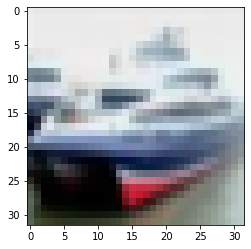

In [24]:
images = x_test[1].reshape(1,3072)
plt.imshow(images.reshape([32,32,3]), cmap = plt.get_cmap("gray_r") )

In [25]:
output = model.predict(x_test[1].reshape(1,32,32,3)).argmax()

In [26]:
output

8

In [50]:
import cv2

img = cv2.imread('dog.jpg')

img = cv2.resize(img, (32,32))
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
img = img/255

In [55]:
out = model.predict(img.reshape(1,32,32,3))

In [56]:
out.argmax()

3

In [58]:
# model.save('model')